In [7]:
import pandas as pd


df = pd.read_csv(r'C:\Users\dlwlg\team901\csv_data\feature값만.csv')


In [8]:
df.head()

,fault_type,pitch_diameter,ball_diameter,contact_angle,ball_count,Hz,speed,mean,absolute_mean,absolute_max,...,peak,skewness,kurtosis,rms,crest_factor,impulse_factor,margin,power,shape_factor,clearance_factor
0,1,34.0,7.5,0,12,25600,1800,0.000028,0.983713,42.172274,...,39.312658,-0.216619,50.233617,2.360864,16.651808,42.870505,39.312629,5.573680,2.399952,7.566325
1,1,34.0,7.5,0,12,25600,1800,-0.006530,1.454661,51.215854,...,38.011598,-0.897048,30.692305,3.405406,11.162132,35.208109,38.018128,11.596793,2.341031,4.416381
2,1,34.0,7.5,0,12,25600,1800,0.002405,1.639501,51.215854,...,46.860159,-0.198037,29.164452,3.927400,11.931597,31.238690,46.857753,15.424473,2.395486,3.320428
3,1,34.0,7.5,0,12,25600,1800,-0.000012,1.396296,51.221962,...,51.221962,-0.223575,41.729800,3.492657,14.665615,36.684164,51.221974,12.198653,2.501372,4.198985
4,1,34.0,7.5,0,12,25600,1800,0.003668,1.026374,41.121889,...,41.121889,0.460944,51.906959,2.539138,16.195219,40.065205,41.118221,6.447219,2.473891,6.378236


In [9]:
df.drop(['pitch_diameter','ball_diameter','contact_angle','ball_count'],axis=1,inplace=True)

In [10]:
df.drop(['Hz'],inplace=True,axis=1)

In [11]:
df.drop(['speed'],inplace=True,axis=1)

In [12]:
df.head()

,fault_type,mean,absolute_mean,absolute_max,std,variance,peak_to_peak,peak,skewness,kurtosis,rms,crest_factor,impulse_factor,margin,power,shape_factor,clearance_factor
0,1,0.000028,0.983713,42.172274,2.360910,5.573898,81.484932,39.312658,-0.216619,50.233617,2.360864,16.651808,42.870505,39.312629,5.573680,2.399952,7.566325
1,1,-0.006530,1.454661,51.215854,3.405467,11.597204,89.227451,38.011598,-0.897048,30.692305,3.405406,11.162132,35.208109,38.018128,11.596793,2.341031,4.416381
2,1,0.002405,1.639501,51.215854,3.927476,15.425070,98.076013,46.860159,-0.198037,29.164452,3.927400,11.931597,31.238690,46.857753,15.424473,2.395486,3.320428
3,1,-0.000012,1.396296,51.221962,3.492725,12.199130,100.392707,51.221962,-0.223575,41.729800,3.492657,14.665615,36.684164,51.221974,12.198653,2.501372,4.198985
4,1,0.003668,1.026374,41.121889,2.539184,6.447458,81.114220,41.121889,0.460944,51.906959,2.539138,16.195219,40.065205,41.118221,6.447219,2.473891,6.378236


In [23]:
df.head()

,mean,absolute_mean,absolute_max,std,variance,peak_to_peak,peak,skewness,kurtosis,rms,crest_factor,impulse_factor,margin,power,shape_factor,clearance_factor
0,0.000028,0.983713,42.172274,2.360910,5.573898,81.484932,39.312658,-0.216619,50.233617,2.360864,16.651808,42.870505,39.312629,5.573680,2.399952,7.566325
1,-0.006530,1.454661,51.215854,3.405467,11.597204,89.227451,38.011598,-0.897048,30.692305,3.405406,11.162132,35.208109,38.018128,11.596793,2.341031,4.416381
2,0.002405,1.639501,51.215854,3.927476,15.425070,98.076013,46.860159,-0.198037,29.164452,3.927400,11.931597,31.238690,46.857753,15.424473,2.395486,3.320428
3,-0.000012,1.396296,51.221962,3.492725,12.199130,100.392707,51.221962,-0.223575,41.729800,3.492657,14.665615,36.684164,51.221974,12.198653,2.501372,4.198985
4,0.003668,1.026374,41.121889,2.539184,6.447458,81.114220,41.121889,0.460944,51.906959,2.539138,16.195219,40.065205,41.118221,6.447219,2.473891,6.378236


In [13]:
df.shape

(1719, 17)

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# features_df는 진동 신호 특성이 담긴 데이터프레임
# 예시로, 결함 여부를 'fault_type' 열로 가정하고, 예측할 목표 변수로 설정
# 특성 데이터와 타겟(결함 여부) 분리
X = df.drop(columns=['fault_type'])  # 'fault_type' 열 제외
y = df['fault_type']  # 'fault_type'을 예측할 타겟 변수로 설정

# 데이터를 학습용 데이터와 테스트용 데이터로 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 정의 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 혼동 행렬과 정밀도, 재현율, F1 점수 등 세부 성능 지표 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        96

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344


Confusion Matrix:
[[92  0  0  0]
 [ 0 86  0  0]
 [ 0  0 70  0]
 [ 0  0  0 96]]


In [15]:
data = pd.read_csv(r'C:\Users\dlwlg\team901\CWRU_stat_modified.csv')

In [30]:
data.head()

,mean,absolute_mean,absolute_max,std,variance,peak_to_peak,peak,skewness,kurtosis,rms,crest_factor,impulse_factor,margin,power,shape_factor,clearance_factor,fault_type
0,0.012240,0.644102,5.469153,1.020835,1.042105,10.743829,5.469153,0.078715,3.937055,1.020909,5.357142,8.491126,5.248180,1.042255,1.585010,5.357142,3
1,0.030963,0.155334,1.100620,0.201571,0.040631,2.097485,1.100620,0.034519,0.995559,0.203936,5.396896,7.085510,27.088147,0.041590,1.312886,5.396896,3
2,0.030412,0.081123,0.445836,0.096858,0.009381,0.879140,0.445836,-0.003132,-0.034958,0.101520,4.391596,5.495812,47.523062,0.010306,1.251439,4.391596,2
3,0.016156,0.114241,0.740167,0.142697,0.020363,1.431727,0.691560,0.007945,0.086951,0.143609,4.815576,6.053512,33.962368,0.020624,1.257069,4.815576,2
4,0.030712,0.185625,0.987209,0.232292,0.053960,1.961475,0.987209,-0.037209,0.170326,0.234313,4.213198,5.318284,18.295338,0.054903,1.262292,4.213198,1


In [20]:
df.head()

,fault_type,mean,absolute_mean,absolute_max,std,variance,peak_to_peak,peak,skewness,kurtosis,rms,crest_factor,impulse_factor,margin,power,shape_factor,clearance_factor
0,1,0.000028,0.983713,42.172274,2.360910,5.573898,81.484932,39.312658,-0.216619,50.233617,2.360864,16.651808,42.870505,39.312629,5.573680,2.399952,7.566325
1,1,-0.006530,1.454661,51.215854,3.405467,11.597204,89.227451,38.011598,-0.897048,30.692305,3.405406,11.162132,35.208109,38.018128,11.596793,2.341031,4.416381
2,1,0.002405,1.639501,51.215854,3.927476,15.425070,98.076013,46.860159,-0.198037,29.164452,3.927400,11.931597,31.238690,46.857753,15.424473,2.395486,3.320428
3,1,-0.000012,1.396296,51.221962,3.492725,12.199130,100.392707,51.221962,-0.223575,41.729800,3.492657,14.665615,36.684164,51.221974,12.198653,2.501372,4.198985
4,1,0.003668,1.026374,41.121889,2.539184,6.447458,81.114220,41.121889,0.460944,51.906959,2.539138,16.195219,40.065205,41.118221,6.447219,2.473891,6.378236


In [21]:
df.shape, data.shape

((1719, 17), (10, 18))

In [22]:
data.drop(['rest_factor'],axis=1,inplace=True)

In [25]:
# Reorder the columns as requested and drop 'rest_factor' if it exists
desired_columns = [
    'fault_type', 'mean', 'absolute_mean', 'absolute_max', 'std', 'variance', 
    'peak_to_peak', 'peak', 'skewness', 'kurtosis', 'rms', 'crest_factor', 
    'impulse_factor', 'margin', 'power', 'shape_factor', 'clearance_factor'
]

# Select the desired columns in the specified order
df_ordered = data[desired_columns]

# Display the first few rows to verify
df_ordered.head()

,fault_type,mean,absolute_mean,absolute_max,std,variance,peak_to_peak,peak,skewness,kurtosis,rms,crest_factor,impulse_factor,margin,power,shape_factor,clearance_factor
0,3,0.012240,0.644102,5.469153,1.020835,1.042105,10.743829,5.469153,0.078715,3.937055,1.020909,5.357142,8.491126,5.248180,1.042255,1.585010,5.357142
1,3,0.030963,0.155334,1.100620,0.201571,0.040631,2.097485,1.100620,0.034519,0.995559,0.203936,5.396896,7.085510,27.088147,0.041590,1.312886,5.396896
2,2,0.030412,0.081123,0.445836,0.096858,0.009381,0.879140,0.445836,-0.003132,-0.034958,0.101520,4.391596,5.495812,47.523062,0.010306,1.251439,4.391596
3,2,0.016156,0.114241,0.740167,0.142697,0.020363,1.431727,0.691560,0.007945,0.086951,0.143609,4.815576,6.053512,33.962368,0.020624,1.257069,4.815576
4,1,0.030712,0.185625,0.987209,0.232292,0.053960,1.961475,0.987209,-0.037209,0.170326,0.234313,4.213198,5.318284,18.295338,0.054903,1.262292,4.213198


In [31]:
df.head()

,fault_type,mean,absolute_mean,absolute_max,std,variance,peak_to_peak,peak,skewness,kurtosis,rms,crest_factor,impulse_factor,margin,power,shape_factor,clearance_factor
0,1,0.000028,0.983713,42.172274,2.360910,5.573898,81.484932,39.312658,-0.216619,50.233617,2.360864,16.651808,42.870505,39.312629,5.573680,2.399952,7.566325
1,1,-0.006530,1.454661,51.215854,3.405467,11.597204,89.227451,38.011598,-0.897048,30.692305,3.405406,11.162132,35.208109,38.018128,11.596793,2.341031,4.416381
2,1,0.002405,1.639501,51.215854,3.927476,15.425070,98.076013,46.860159,-0.198037,29.164452,3.927400,11.931597,31.238690,46.857753,15.424473,2.395486,3.320428
3,1,-0.000012,1.396296,51.221962,3.492725,12.199130,100.392707,51.221962,-0.223575,41.729800,3.492657,14.665615,36.684164,51.221974,12.198653,2.501372,4.198985
4,1,0.003668,1.026374,41.121889,2.539184,6.447458,81.114220,41.121889,0.460944,51.906959,2.539138,16.195219,40.065205,41.118221,6.447219,2.473891,6.378236


In [27]:
# 새로운 데이터셋을 사용하여 예측
X_new = df_ordered.drop(columns=['fault_type'])  # 'fault_type' 열을 제외하고 사용

# 예측 수행
y_pred = model.predict(X_new)

# 예측 결과 출력
print("Predicted fault types:", y_pred)

Predicted fault types: [3 3 0 0 3 3 0 0 0 0]


In [29]:
df.shape , df_ordered.shape

((1719, 17), (10, 17))

In [5]:
print("Class distribution in y:")
print(y.value_counts())


Class distribution in y:
fault_type
2    431
1    430
3    429
0    429
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import cross_val_score

# 교차 검증 사용
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")


Cross-Validation Accuracy: 100.00%


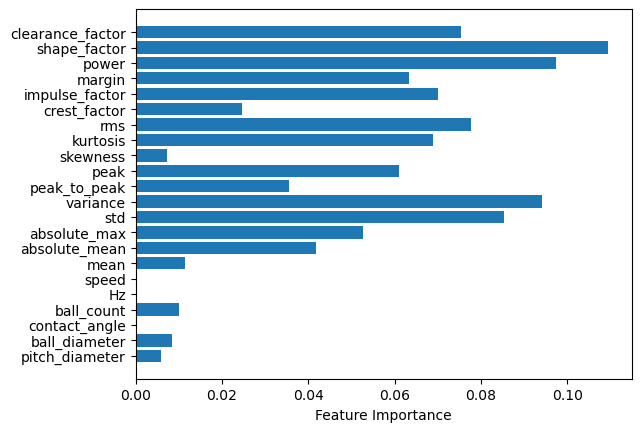

In [8]:
import matplotlib.pyplot as plt

# 특성 중요도 확인
importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.show()

                  fault_type  pitch_diameter  ball_diameter  contact_angle  \
fault_type          1.000000        0.000162       0.000162            NaN   
pitch_diameter      0.000162        1.000000       1.000000            NaN   
ball_diameter       0.000162        1.000000       1.000000            NaN   
contact_angle            NaN             NaN            NaN            NaN   
ball_count          0.000162        1.000000       1.000000            NaN   
Hz                       NaN             NaN            NaN            NaN   
speed                    NaN             NaN            NaN            NaN   
mean                0.125331        0.451663       0.451663            NaN   
absolute_mean       0.341258       -0.552189      -0.552189            NaN   
absolute_max        0.147116       -0.546610      -0.546610            NaN   
std                 0.283676       -0.548854      -0.548854            NaN   
variance            0.335345       -0.496784      -0.496784     

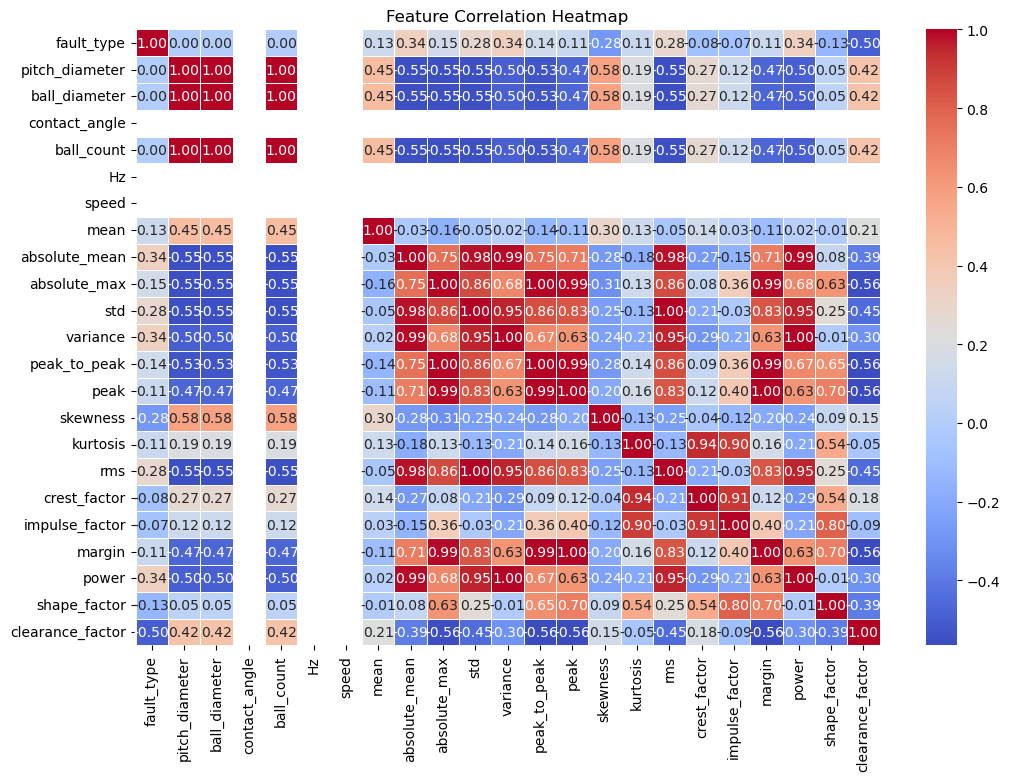

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# features_df는 특성 데이터프레임이라고 가정
# 상관관계 행렬 계산
correlation_matrix = df.corr()

# 상관관계 행렬 출력
print(correlation_matrix)

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [14]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=100, max_depth=10, reg_lambda=1,random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도(Accuracy) 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 분류 리포트 출력 (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 99.42%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        92
           1       0.99      1.00      0.99        86
           2       1.00      1.00      1.00        70
           3       0.99      0.99      0.99        96

    accuracy                           0.99       344
   macro avg       0.99      0.99      0.99       344
weighted avg       0.99      0.99      0.99       344


Confusion Matrix:
[[91  0  0  1]
 [ 0 86  0  0]
 [ 0  0 70  0]
 [ 0  1  0 95]]


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(XGBoostClass(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [16]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200],   # 트리 개수
    'max_depth': [10, 20],        # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1], # 학습률 추가
    'reg_lambda': [1, 10]         # 정규화 파라미터 추가
}

# GridSearchCV를 XGBClassifier와 함께 사용
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5,   # 5-fold 교차 검증
                           verbose=1,   # 학습 과정 출력
                           n_jobs=-1)   # 가능한 모든 CPU 사용

# 그리드 서치 실행 (최적의 하이퍼파라미터 탐색)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'reg_lambda': 1}


In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# X와 y 설정
X = df[['pitch_diameter', 'ball_diameter', 'contact_angle', 'ball_count', 'Hz', 'speed']]  # 특성 변수
y = df['fault_type']  # 타겟 변수

# 학습용 데이터와 테스트용 데이터로 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 정의 및 학습
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도(Accuracy) 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 분류 리포트 출력 (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 20.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.00      0.00      0.00        86
           2       0.20      1.00      0.34        70
           3       0.00      0.00      0.00        96

    accuracy                           0.20       344
   macro avg       0.05      0.25      0.08       344
weighted avg       0.04      0.20      0.07       344


Confusion Matrix:
[[ 0  0 92  0]
 [ 0  0 86  0]
 [ 0  0 70  0]
 [ 0  0 96  0]]


c:\Users\dlwlg\miniconda3\envs\dav\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dlwlg\miniconda3\envs\dav\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dlwlg\miniconda3\envs\dav\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 사용하려는 특성 선택
X = df[['std', 'ball_diameter', 'power', 'pitch_diameter', 'contact_angle', 'Hz', 'speed', 
        'absolute_max', 'peak', 'peak_to_peak', 'skewness', 'kurtosis', 'rms', 'crest_factor', 
        'impulse_factor', 'shape_factor', 'clearance_factor']]

y = df['fault_type']  # 타겟 변수 (결함 여부)

# 학습용 데이터와 테스트용 데이터로 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 오버샘플링을 통해 클래스 불균형 해결 (학습 데이터에만 적용)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# XGBoost 모델 정의 및 학습
model = xgb.XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, reg_lambda=10, random_state=42)
model.fit(X_resampled, y_resampled)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도(Accuracy) 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 분류 리포트 출력 (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 98.84%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        92
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        70
           3       0.99      0.97      0.98        96

    accuracy                           0.99       344
   macro avg       0.99      0.99      0.99       344
weighted avg       0.99      0.99      0.99       344


Confusion Matrix:
[[91  0  0  1]
 [ 0 86  0  0]
 [ 0  0 70  0]
 [ 3  0  0 93]]


In [28]:
X_resampled.shape , X_train.shape

((1444, 17), (1375, 17))

In [32]:
y_resampled.shape, y_train.shape

((1444,), (1375,))

Accuracy: 88.08%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        92
           1       0.84      0.80      0.82        86
           2       0.95      0.77      0.85        70
           3       1.00      0.99      0.99        96

    accuracy                           0.88       344
   macro avg       0.89      0.87      0.88       344
weighted avg       0.89      0.88      0.88       344


Confusion Matrix:
[[85  5  2  0]
 [16 69  1  0]
 [ 8  8 54  0]
 [ 1  0  0 95]]


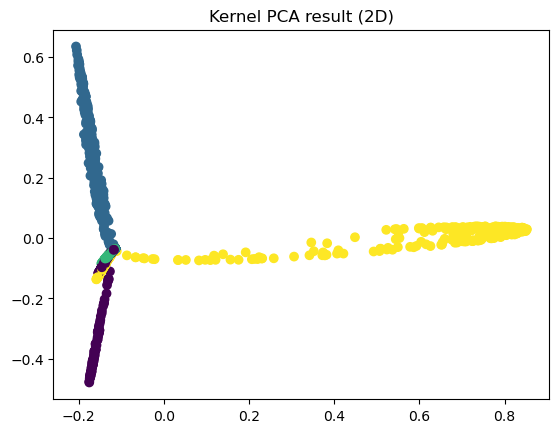

In [34]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 사용하려는 특성 선택
X = df[['std', 'ball_diameter', 'power', 'pitch_diameter', 'contact_angle', 'Hz', 'speed', 
        'absolute_max', 'peak', 'peak_to_peak', 'skewness', 'kurtosis', 'rms', 'crest_factor', 
        'impulse_factor', 'shape_factor', 'clearance_factor']]
y = df['fault_type']  # 타겟 변수 (결함 여부)

# 학습용 데이터와 테스트용 데이터로 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 피처 스케일링 (커널 PCA를 적용하기 위해 학습/테스트 데이터를 따로 스케일링)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # X_test는 학습 데이터로 학습된 scaler를 사용해 변환

# 커널 PCA 적용 (RBF 커널 사용)
kpca = KernelPCA(n_components=10, kernel='rbf', gamma=15)
X_train_kpca = kpca.fit_transform(X_train_scaled)
X_test_kpca = kpca.transform(X_test_scaled)  # 테스트 데이터도 동일한 변환을 적용

# 주성분으로 변환된 데이터로 모델 학습
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train_kpca, y_train)

# 모델 성능 평가
y_pred = model.predict(X_test_kpca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 정밀도, 재현율, F1 점수, 혼동 행렬 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 시각화 (2차원으로 축소한 경우, 시각화를 위해 n_components=2로 설정 가능)
plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_train)
plt.title("Kernel PCA result (2D)")
plt.show()
